# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/langhan/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


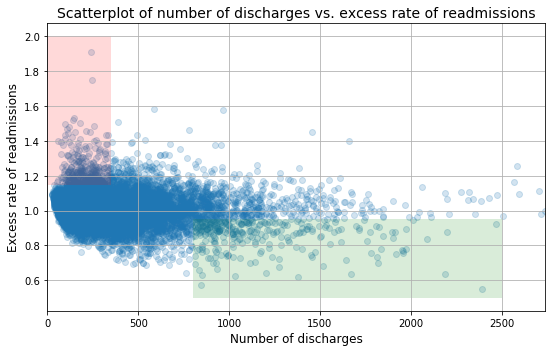

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Do you agree with the above analysis and recommendations? Why or why not?
**Calculations:** It's unclear what the predictions and expected values mean. Furthermore, why would hospitals be rated on a combination of projected values, instead of actual readmission rates? The prediction model and expected value calculations could contain errors and misleading information. As a result, all conclusions based on the data would be unfounded. It's disturbing to think that funding for a life or death service would calculated by these methods.

**Conclusions:** No analysis was done to establish a correlation between hospital capacity (number of discharges) and readmission rates. Plotting data is a useful starting point, however further statistical analysis is needed. A hypothesis test should have been implemented to infer whether observed correlations are statistically significant or not.

**Regulatory policy recommendations:** Recommendations should take into account analytical results as well as practical knowledge. When you need a hospital, you often need to get there as soon as possible. Suggesting there should be fewer hospitals may ignore the need for smaller, accessible facilities in rural or underserved areas. Additionally, consolidating hospitals doesn't automatically mean larger capacity. Increasing a facility's size could be more costly than a slightly higher readmittance rate.

### Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### Inspect the Data

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


#### Remove null values

In [6]:
df = clean_hospital_read_df

In [7]:
df.dropna(subset=['Number of Readmissions'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


### 1. Setup an appropriate hypothesis test.
H<sub>0</sub>: There is no significant correlation between hospital capacity (number of discharges) and readmission rates.  
H<sub>a</sub>: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.  
$\alpha$ = .01

### 2. Compute and report the observed significance value (or p-value).

r = -0.09739794351079353 , p = 1.222547377680967e-25


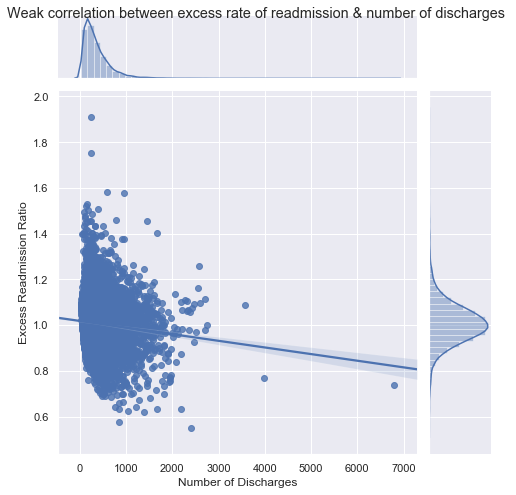

In [9]:
# Compute Pearson correlation coefficient and p-value
r_row, p_value = scipy.stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])
print('r =',r_row, ', p =',p_value)
                                      
# scatterplot
sns.set()
g=sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df,
              kind='reg', height=7)
g.fig.suptitle('Weak correlation between excess rate of readmission & number of discharges \n')
plt.show()

### 3. Report statistical significance for $\alpha$ = .01. 
Our p-value is very small, thus we will reject our null hypothesis. There is a statistically significant correlation between hospital size (Number of Discharges) and the Excess Readmission Rate.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Although there is a statistically significant correlation, it is a weak correlation of -0.097. Practically speaking, this slight relationship between hospital size and excess readmission is not enough to base policy recommendations on. I would not suggest hospital consolidation nor a requirement for small facilities to demonstrate upgraded resource allocation.

###    5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

The main disadvantage of this plot is that explanations are required to understand it. Not only is meaning of the Excess Rate of Readmission unclear, the plot doesn't draw a clear relationship between the variables. The red and green highlighted sections are effective in drawing our eyes to certain parts of the graph. Labeling the highlighted areas might have further clarified what the author wants us to see. Unfortunately, the graph did not support the written analysis. Visually, we notice a weak correlation between the variables, but the commentary asks us to see the opposite conclusion.

One simple improvement to the graph would be to add a linear regression line (as in the graph above). This makes the correlation more explicit to the viewer. It confirms the relationship our eyes have already started to estimate. 

### Additional Plots and Analysis

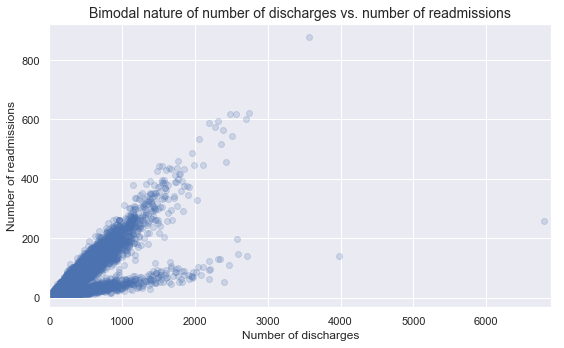

In [10]:
# generate a scatterplot for number of discharges vs. number of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in df['Number of Discharges']]
y = list(df['Number of Readmissions'])

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.scatter(x, y,alpha=0.2)

ax1.set_xlim([0, (max(x) + 100)])
ax1.set_xlabel('Number of discharges', fontsize=12)
ax1.set_ylabel('Number of readmissions', fontsize=12)
ax1.set_title('Bimodal nature of number of discharges vs. number of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [11]:
df['Readmission Rate'] = df['Number of Readmissions']/df['Number of Discharges']


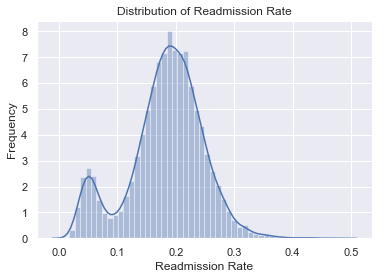

In [12]:
# Histogram of the Readmission to Discharge ratio
_ = sns.distplot(df['Readmission Rate'])
_ = plt.title('Distribution of Readmission Rate')
_ = plt.xlabel('Readmission Rate')
_ = plt.ylabel('Frequency')

plt.show()

#### Observation: 
Both of the graphs above show the Readmission Ratio's bimodal distribution. Hospitals cluster in to two groups, approximately a 20% Readmission rate and 5% Readmission rate.

### Do small hospitals readmit a higher ratio of patients than large hospitals?
* Small hospitals: Number of discharges < 300
* Large hospitals: Number of discharges $\ge$ 300

In [13]:
small_hospitals = df[df['Number of Discharges'] < 300]
large_hospitals = df[df['Number of Discharges'] >= 300]

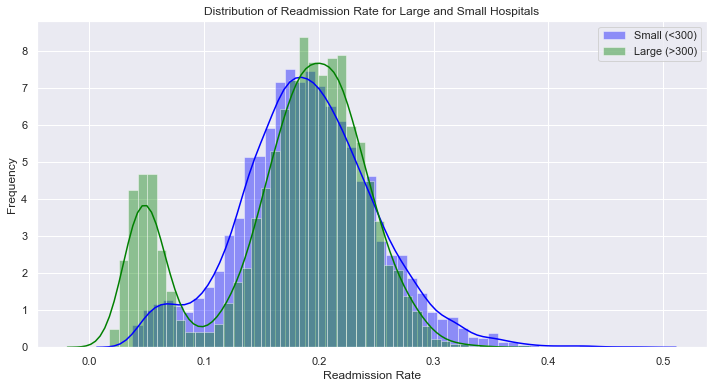

In [14]:
fig = plt.figure(figsize=(12,6))
ax2 = sns.distplot(small_hospitals['Readmission Rate'], color = 'blue')
ax2 = sns.distplot(large_hospitals['Readmission Rate'], color = 'green')
ax2.legend(['Small (<300)','Large (>300)'])
ax2.set_title('Distribution of Readmission Rate for Large and Small Hospitals')
ax2.set_xlabel('Readmission Rate')
ax2.set_ylabel('Frequency')
plt.show()

#### Observation:
The group of hospitals with > 300 discharges do have a larger portion of facilities with <10% Readmission rate. However, both sample populations have a bimodal distribution. 

### Correlation between the Excess Readmission Ratio and the actual Readmission Rate

r = 0.4139857014970306 , p = 0.0


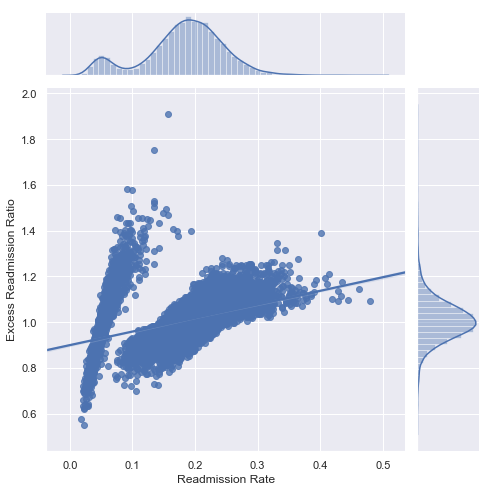

In [15]:
# Compute Pearson correlation coefficient and p-value
r_row, p_value = scipy.stats.pearsonr(df['Readmission Rate'], df['Excess Readmission Ratio'])
print('r =',r_row, ', p =',p_value)
                                      
# scatterplot
sns.set()
sns.jointplot('Readmission Rate', 'Excess Readmission Ratio', data=df,
              kind='reg', height=7)
plt.show()

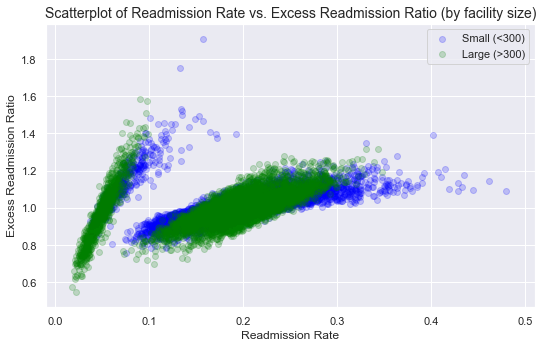

In [16]:
# generate a scatterplot for Readmission Rate vs. Excess Readmission Ratio
x1 = list(small_hospitals['Readmission Rate'])
y1 = list(small_hospitals['Excess Readmission Ratio'])
x2 = list(large_hospitals['Readmission Rate'])
y2 = list(large_hospitals['Excess Readmission Ratio'])

fig, ax2 = plt.subplots(figsize=(8,5))
ax2.scatter(x1, y1,alpha=0.2, color = 'blue')
ax2.scatter(x2, y2,alpha=0.2, color = 'green')
ax2.legend(['Small (<300)','Large (>300)'])
ax2.set_xlabel('Readmission Rate', fontsize=12)
ax2.set_ylabel('Excess Readmission Ratio', fontsize=12)
ax2.set_title('Scatterplot of Readmission Rate vs. Excess Readmission Ratio (by facility size)', fontsize=14)

ax2.grid(True)
fig.tight_layout()
plt.show()

#### Conclusion:
* When it comes to readmission rates, hospitals tend to cluster around a 20% rate and 5% rate. This is true of large and small hospitals, though larger facilities have a higher proportion close to a 5% readmission rate.
* The previously used Excess Readmission Ratio has a medium correlation with actual Readmission Rate (r = 0.41). It has a very weak correlation with hospital capacity (number of discharges).

#### Recommendation:
* Calculations for the Excess Readmission Ratio should be re-evaluated as statistically practical metric.
